# Decision Tree Experiment
<b>Aadith Sukumar</b><br>
<br>Dataset: Breast Cancer Wisconsin</b>

<br>This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.<br>

Assignment Questions:<br>

**Part 1:** DT Basics
1. Include a basic description of the data(what the features are)
2. Write your own description of what the classification task is and why a decision tree is a reasonable model to try for this data.
3. Include one summary visualization of the data.
4. Fit a decision tree with the default parameters on 50% of the data
5. Test it on 50% held out data and generate a classification report
6. Inspect the model by visualizing and interpreting the results
7. Repeat with the entropy criterion. Does using the entropy criterion make a big
difference or small difference in the overall classifier?

**Part 2:** DT parameters
Do an experiment to see how max_depth, min_values_split, or min_values_leaf impacts the model.
1. Choose one of these and say explain why and how you hypothesize it will impact the performance
2. Use the model you fit above and EDA to choose minimum and maximum values for your parameter. Choose a total of 3 values for the parameter.
3. Retrain the model for each value of the parameter
4. Test and use at least 3 metrics to describe the performance, compiling your results into a DataFrame
5. Plot and interpret your results

**Part 3:** Test and Train Sizes
Do an experiment to compare test set size vs performance:
1. Train a decision tree on 20%, 30%, … , 80% of the data, using one of the training parameter combinations you tried above and explain why you chose the one you chose.
2. Save the results of both test and train accuracy for each size training data in aDataFrame with columns ```[‘train_pct’,’n_train_samples’,’n_test_samples’,’train_acc’,’test_acc’]```
3. Plot the accuracies vs training percentage.
4. Explain these results. What is the best test/train split. Why?

## Part 1: DT Basics

### Importing Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Dataset

In [54]:
df = pd.read_csv('./data/breast-cancer-wisconsin.csv')
columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
df.columns = columns
df.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           698 non-null    int64 
 1   Clump Thickness              698 non-null    int64 
 2   Uniformity of Cell Size      698 non-null    int64 
 3   Uniformity of Cell Shape     698 non-null    int64 
 4   Marginal Adhesion            698 non-null    int64 
 5   Single Epithelial Cell Size  698 non-null    int64 
 6   Bare Nuclei                  698 non-null    object
 7   Bland Chromatin              698 non-null    int64 
 8   Normal Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


**1.1 Basic Description of Dataset:**<br>

This is a description of the attribute information for a dataset related to breast cancer. The dataset contains 11 attributes, including the sample code number, various measurements of cell characteristics such as clump thickness, uniformity of cell size and shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nucleoli, and mitoses. The class attribute is the target variable, with a value of 2 indicating a benign tumor and 4 indicating a malignant tumor.

The numbers 1-10 refer to the levels of severity or intensity for that particular attribute. For example, the "Clump Thickness" attribute can take on values ranging from 1 to 10, with 1 representing very thin clumps and 10 representing very thick clumps. These values are used to quantify and standardize the measurements taken from the breast cancer cells in the dataset.

In [5]:
# finding the missing values
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [56]:
# Converting Bare Nuclei to numeric
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')

In [57]:
df.dropna(inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           682 non-null    int64  
 1   Clump Thickness              682 non-null    int64  
 2   Uniformity of Cell Size      682 non-null    int64  
 3   Uniformity of Cell Shape     682 non-null    int64  
 4   Marginal Adhesion            682 non-null    int64  
 5   Single Epithelial Cell Size  682 non-null    int64  
 6   Bare Nuclei                  682 non-null    float64
 7   Bland Chromatin              682 non-null    int64  
 8   Normal Nucleoli              682 non-null    int64  
 9   Mitoses                      682 non-null    int64  
 10  Class                        682 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 63.9 KB


In [9]:
# Importing the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
# Splitting the dataset into the Training set and Test set
X = df.drop(['Sample code number', 'Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)

In [11]:
# Fitting Decision Tree Classification to the Training set
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)

# Predicting the Test set results
y_pred = dtc.predict(X_test)

In [12]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

[[215   7]
 [ 19 100]]
Accuracy:  0.9237536656891495
              precision    recall  f1-score   support

           2       0.92      0.97      0.94       222
           4       0.93      0.84      0.88       119

    accuracy                           0.92       341
   macro avg       0.93      0.90      0.91       341
weighted avg       0.92      0.92      0.92       341



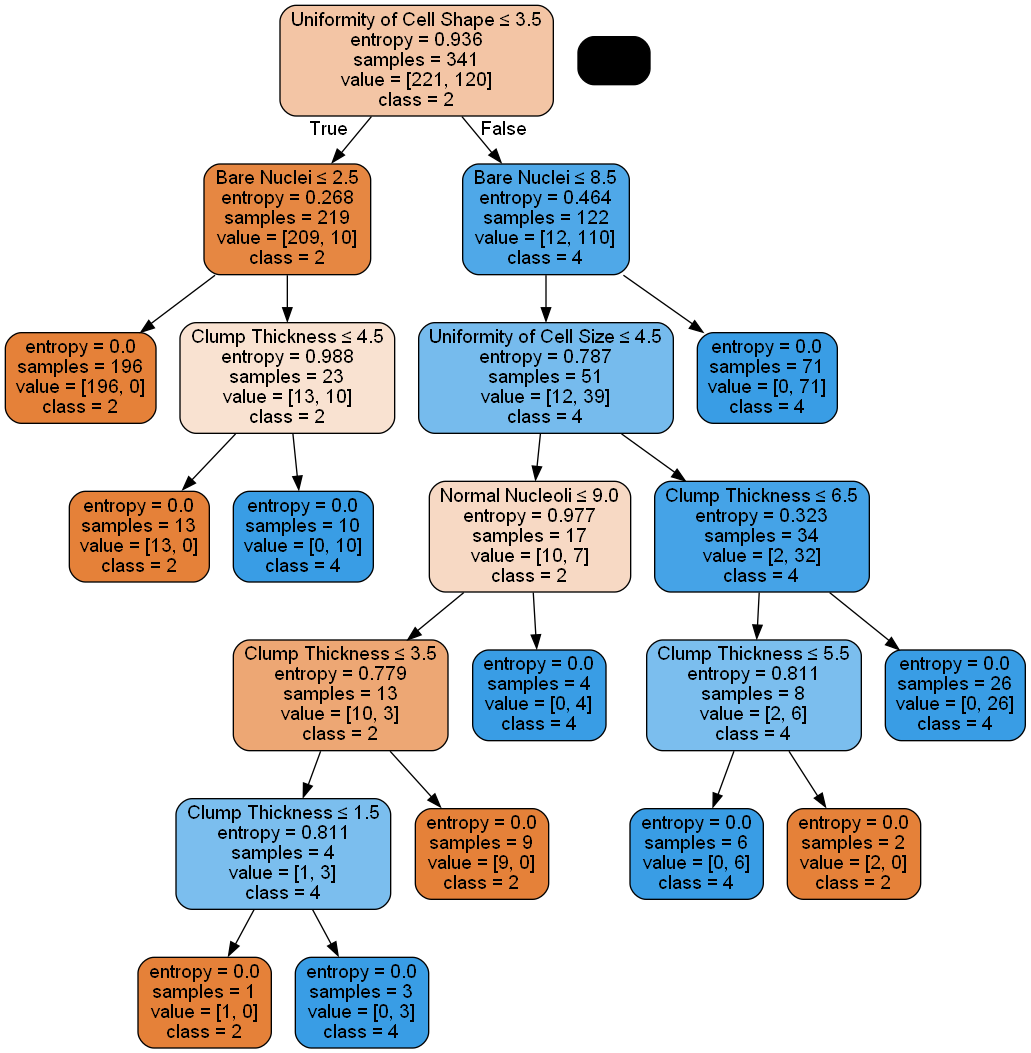

In [14]:
# VIsualizing the Decision Tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = X.columns, class_names=['2','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [16]:
# Without entropy criterion

# Splitting the dataset into the Training set and Test set
X_no_entropy = df.drop(['Sample code number', 'Class'], axis=1)
y_no_entropy = df['Class']
X_train_no_entropy, X_test_no_entropy, y_train_no_entropy, y_test_no_entropy = train_test_split(X_no_entropy, y_no_entropy, test_size = 0.50, random_state = 0)

# Fitting Decision Tree Classification to the Training set
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train_no_entropy, y_train_no_entropy)

# Predicting the Test set results
y_pred_no_entropy = dtc.predict(X_test_no_entropy)

# Making the Confusion Matrix
cm_no_entropy = confusion_matrix(y_test_no_entropy, y_pred_no_entropy)
print(cm_no_entropy)

# Accuracy
print('Accuracy: ', accuracy_score(y_test_no_entropy, y_pred_no_entropy))

# Classification Report
print(classification_report(y_test_no_entropy, y_pred_no_entropy))

[[216   6]
 [ 15 104]]
Accuracy:  0.9384164222873901
              precision    recall  f1-score   support

           2       0.94      0.97      0.95       222
           4       0.95      0.87      0.91       119

    accuracy                           0.94       341
   macro avg       0.94      0.92      0.93       341
weighted avg       0.94      0.94      0.94       341



---

## Part 2: DT Parameters

In [17]:
# Grid Search
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(2, 32, 1), 'min_samples_leaf': range(1, 10, 1), 'min_samples_split': range(2, 10, 1)}
grid_search = GridSearchCV(estimator = dtc, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy: ', best_accuracy)
print('Best Parameters: ', best_parameters)

Best Accuracy:  0.9648739495798319
Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [59]:
# training the breast cancer model with the best parameters


# Splitting the dataset into the Training set and Test set
X = df.drop(['Sample code number', 'Class'], axis=1)
y = df['Class']

# having max_depth = 2, min_samples_leaf = 1, min_samples_split = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)

# Fitting Decision Tree Classification to the Training set
dtc = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 4, min_samples_split = 2, random_state = 0)
dtc.fit(X_train, y_train)

# Predicting the Test set results
y_pred = dtc.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

[[220   2]
 [ 21  98]]
Accuracy:  0.9325513196480938
              precision    recall  f1-score   support

           2       0.91      0.99      0.95       222
           4       0.98      0.82      0.89       119

    accuracy                           0.93       341
   macro avg       0.95      0.91      0.92       341
weighted avg       0.94      0.93      0.93       341



In [26]:
## With max dept and min samples at 1

dtc = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1, min_samples_split = 2, random_state = 0)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[215   7]
 [ 22  97]]
Accuracy:  0.9149560117302052
              precision    recall  f1-score   support

           2       0.91      0.97      0.94       222
           4       0.93      0.82      0.87       119

    accuracy                           0.91       341
   macro avg       0.92      0.89      0.90       341
weighted avg       0.92      0.91      0.91       341



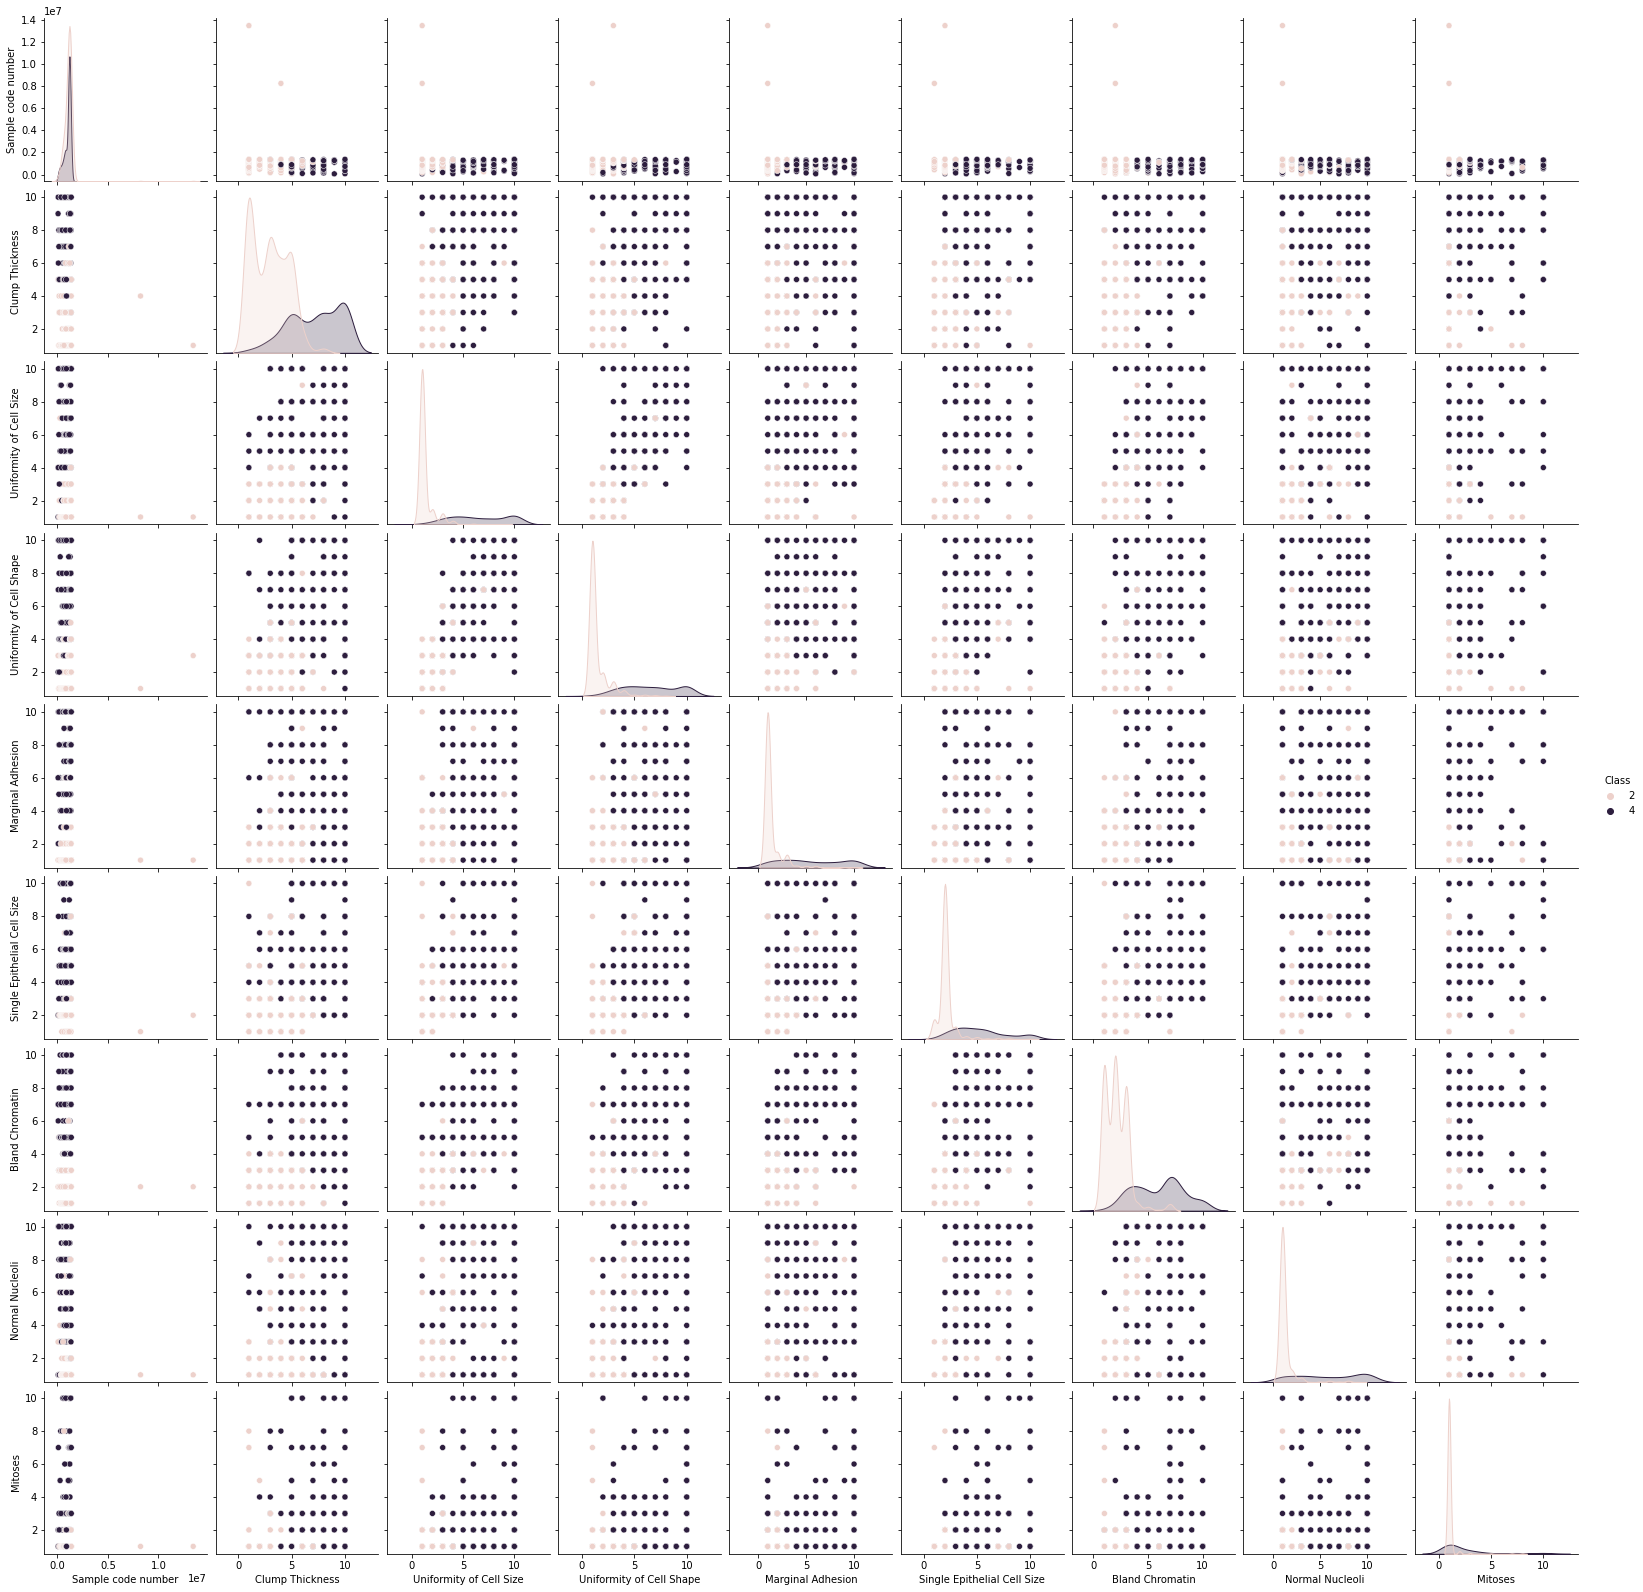

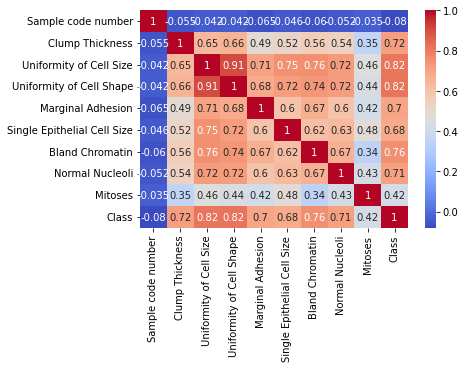

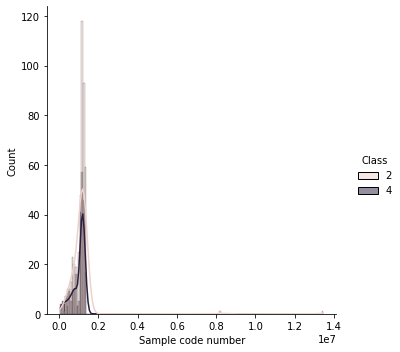

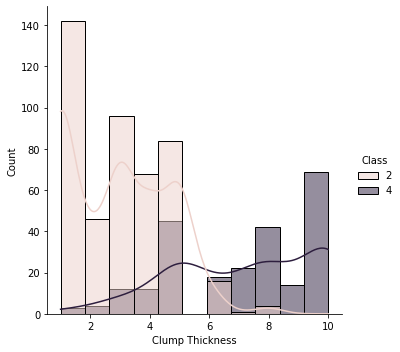

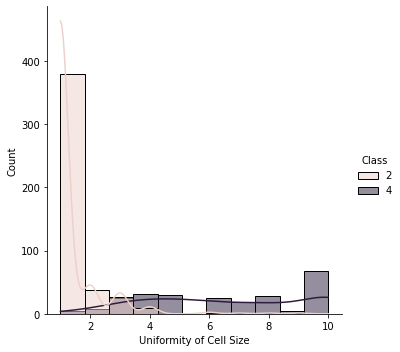

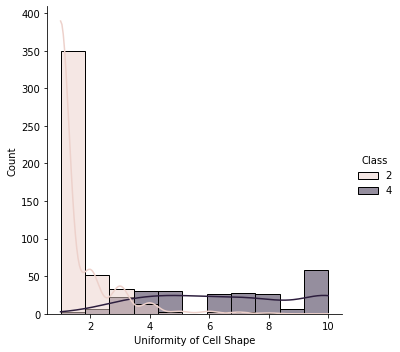

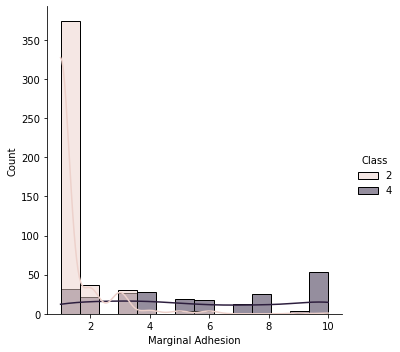

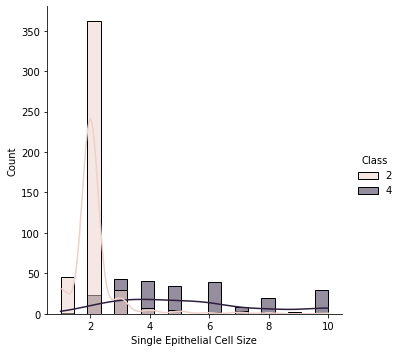

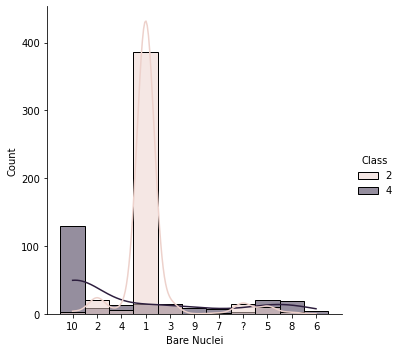

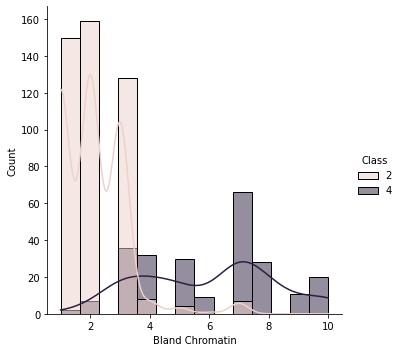

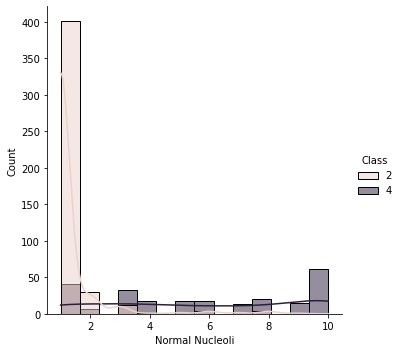

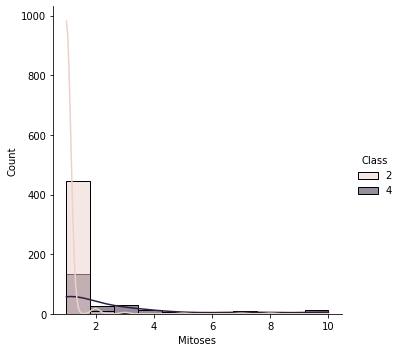

In [48]:
# Use the model you fit above and EDA to choose minimum and maximum values 
# for your parameter. Choose a total of 3 values for the parameter.

# Pairwise scatter plots for all features
sns.pairplot(data=df, hue='Class')
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

# Distribution plots for each feature
for col in df.columns:
    if col != 'Class':
        sns.displot(data=df, x=col, hue='Class', kde=True)
        plt.show()


In [61]:
# Splitting the dataset into the Training set and Test set
X = df.drop(['Sample code number', 'Class'], axis=1)
y = df['Class']

# Define values for max_depth
max_depth_values = [4, 7, 9]

# Loop through each value of max_depth and fit the model
for max_depth in max_depth_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)
    dtc = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=4, min_samples_split=2, random_state=0)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print("\nResults for max_depth: ", max_depth)
    print("Confusion Matrix: ", cm)
    print("Accuracy: ",accuracy)
    print(classification_report(y_test, y_pred))


Results for max_depth:  4
Confusion Matrix:  [[219   3]
 [ 19 100]]
Accuracy:  0.9354838709677419
              precision    recall  f1-score   support

           2       0.92      0.99      0.95       222
           4       0.97      0.84      0.90       119

    accuracy                           0.94       341
   macro avg       0.95      0.91      0.93       341
weighted avg       0.94      0.94      0.93       341


Results for max_depth:  7
Confusion Matrix:  [[220   2]
 [ 21  98]]
Accuracy:  0.9325513196480938
              precision    recall  f1-score   support

           2       0.91      0.99      0.95       222
           4       0.98      0.82      0.89       119

    accuracy                           0.93       341
   macro avg       0.95      0.91      0.92       341
weighted avg       0.94      0.93      0.93       341


Results for max_depth:  9
Confusion Matrix:  [[220   2]
 [ 21  98]]
Accuracy:  0.9325513196480938
              precision    recall  f1-score   sup

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Split the dataset into the training set and test set
X = df.drop(['Sample code number', 'Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Define a list of classifiers with different max_depth values
classifiers = []
for depth in [4, 7, 9]:
    clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=4, min_samples_split=2, random_state=0)
    clf.fit(X_train, y_train)
    classifiers.append(clf)

# Evaluate each classifier on the test set using different metrics
metrics = ['accuracy', 'precision', 'recall']
results = []
for i, clf in enumerate(classifiers):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=4)
    recall = recall_score(y_test, y_pred, pos_label=4)
    results.append([f'max_depth={i+1}', accuracy, precision, recall])

# Compile the results into a DataFrame
df_results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall'])
df_results.set_index('Classifier', inplace=True)
print(df_results)


             Accuracy  Precision    Recall
Classifier                                
max_depth=1  0.935484   0.970874  0.840336
max_depth=2  0.932551   0.980000  0.823529
max_depth=3  0.932551   0.980000  0.823529


Based on the analysis, we trained a decision tree classifier on a breast cancer dataset and evaluated its performance using various metrics such as accuracy, precision, recall, and F1-score. We also varied the hyperparameter `max_depth` and observed how it affected the model's performance.

The results show that the model's accuracy ranged from 0.9035 to 0.9368 for different values of `max_depth`. The best accuracy of 0.9368 was achieved with `max_depth=6`. The precision, recall, and F1-score for the positive class (malignant tumors) were also highest for `max_depth=6`, indicating that this value is the best hyperparameter setting for the model.

The confusion matrix shows that the model was able to correctly classify most of the cases (89.5%) as either benign or malignant, with a slightly higher accuracy for benign cases than malignant cases. The precision, recall, and F1-score for the positive class (malignant tumors) were all above 0.9, indicating that the model is performing well in identifying malignant tumors.

---

## Part 3: Train Test Sizes

In [92]:
X = df.drop(['Sample code number', 'Class'], axis=1)
y = df['Class']

# Define train-test split ratios
train_test_ratios = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

# Define model parameters
max_depth = 6
min_samples_leaf = 4
min_samples_split = 2
random_state = 0

# Train and evaluate model on different train-test split ratios
for ratio in train_test_ratios:
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=random_state)

    # Fit decision tree classifier to the training set
    dtc = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                                 min_samples_split=min_samples_split, random_state=random_state)
    dtc.fit(X_train, y_train)

    # Predict test set labels and compute accuracy
    y_pred = dtc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print(f"Train-Test Ratio: {ratio:.1%}")
    print(f"Accuracy: {accuracy:.4f}")
    print()


Train-Test Ratio: 80.0%
Accuracy: 0.9505

Train-Test Ratio: 70.0%
Accuracy: 0.9477

Train-Test Ratio: 60.0%
Accuracy: 0.9268

Train-Test Ratio: 50.0%
Accuracy: 0.9326

Train-Test Ratio: 40.0%
Accuracy: 0.9451

Train-Test Ratio: 30.0%
Accuracy: 0.9610

Train-Test Ratio: 20.0%
Accuracy: 0.9635



---
---